In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#import data
data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv')
data.shape

(200, 6)

In [4]:
#affichage dataset
data.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
#trasformer variable qualificative et quantitative
data['Sex'].replace(['M', 'F'], [0, 1], inplace = True) 
data['BP'].replace(['LOW', 'NORMAL', 'HIGH'], [0, 1, 2], inplace = True)
data['Cholesterol'].replace(['NORMAL', 'HIGH'], [0, 1], inplace = True)
data['Drug'].replace(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], [0, 1, 2, 3, 4], inplace = True)

In [6]:
#affichage dataset
data.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,25.355,4
1,47,0,0,1,13.093,2
2,47,0,0,1,10.114,2
3,28,1,1,1,7.798,3
4,61,1,0,1,18.043,4


In [8]:
#couper dataset 
X = data[['Age','Sex','BP','Cholesterol','Na_to_K']]
y = data['Drug']

In [16]:
#preparer les données d'entrainment et données test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("train data set shape : ", X_train.shape)
print("train target set shape : ", y_train.shape)
print("test data set shape : ", X_test.shape)
print("test target set shape : ",y_test.shape)

train data set shape :  (160, 5)
train target set shape :  (160,)
test data set shape :  (40, 5)
test target set shape :  (40,)


Text(0.5, 1.0, 'test_set')

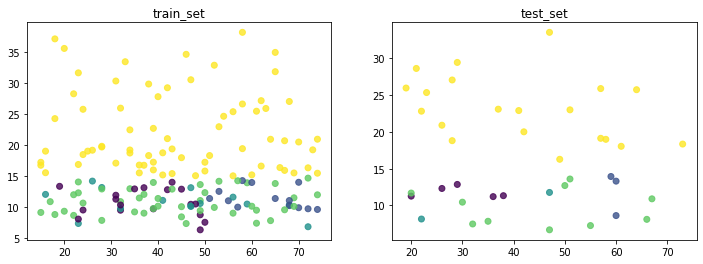

In [18]:
#plot train test data
plt.figure(figsize= (12, 4))
plt.subplot(121)
plt.scatter(X_train['Age'].values, X_train['Na_to_K'].values, c = y_train.values, alpha=0.8)

plt.title('train_set')
plt.subplot(122)
plt.scatter(X_test['Age'].values, X_test['Na_to_K'].values, c = y_test, alpha=0.8)
plt.title('test_set')

In [19]:
#initialiser model knn
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [20]:
#entrainer le model 
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [21]:
#validite du model 
model.score(X_test, y_test)

0.85

In [22]:
#cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(1), X_train, y_train, cv = 5, scoring = 'accuracy').mean()

0.65

In [27]:
#utiliser validation_curve sur knn pour n=50
from sklearn.model_selection import validation_curve
model = KNeighborsClassifier()
k = np.arange(1, 50)
train_score, val_score = validation_curve(model, X_train, y_train, 'n_neighbors', k, cv = 5)

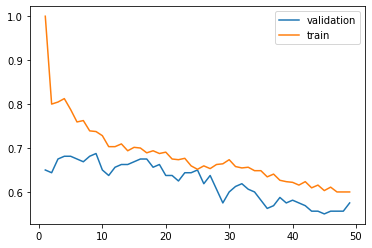

In [28]:
#plot validation train score
plt.plot(k, val_score.mean(axis = 1), label = 'validation')
plt.plot(k, train_score.mean(axis = 1), label = 'train')
plt.legend()

In [29]:
#pour selection les meilleurs param pour notre model knn on utilise GridSearch
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1, 20), 
              'metric':['euclidean','manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)

In [30]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [31]:
#meilleur score propose 
grid.best_score_

0.7375

In [32]:
#meilleur param propose 
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 1}

In [34]:
#meilleur model
model = grid.best_estimator_

In [35]:
model.score(X_test, y_test)

0.85